
# Projeto de Machine Learning - 4° Período de ADS, Unibra
---
Os Cinco Grandes Traços de Personalidade, também conhecidos como modelo de cinco fatores (FFM) e modelo OCEAN, são uma taxonomia, ou agrupamento, para traços de personalidade. Quando a análise fatorial (uma técnica estatística) é aplicada a dados de pesquisas de personalidade, algumas palavras usadas para descrever aspectos da personalidade são frequentemente aplicadas à mesma pessoa. Por exemplo, é mais provável que alguém descrito como consciencioso seja descrito como “sempre preparado” em vez de “bagunçado”. Esta teoria baseia-se, portanto, na associação entre palavras, mas não em experiências neuropsicológicas. Esta teoria utiliza descritores de linguagem comum e, portanto, sugere cinco grandes dimensões comumente usadas para descrever a personalidade e a psique humanas.


---


# Alunos participantes: Maurício Henrique, Vinícius Souza, Jefferson Douglas e Vinícius Magalhães


# *Introdução*

Neste projeto, exploramos o conjunto de dados do Big Five Personality Test disponível no Kaggle para identificar padrões e agrupar os participantes em cinco grupos distintos. Utilizando técnicas de machine learning e análise de dados, buscamos compreender melhor os traços de personalidade dos indivíduos e como eles se relacionam uns com os outros.

# *Objetivo*

O objetivo principal deste projeto é aplicar algoritmos de clustering para agrupar os participantes do teste de personalidade em cinco grupos, baseando-se nas respostas dos cinco grandes traços de personalidade: Abertura, Conscienciosidade, Extroversão, Amabilidade e Neuroticismo. Esses grupos ajudarão a identificar perfis de personalidade distintos dentro do conjunto de dados.

Passos que o Colab irá seguir:

**1 - Coleta de Dados:**

Utilizamos o conjunto de dados "Big Five Personality Test" disponível no Kaggle, que contém respostas de participantes a um questionário de personalidade.

**2 - Pré-processamento de Dados:**

Limpeza dos dados para lidar com valores ausentes e outliers.
Normalização dos dados para garantir que todos os traços de personalidade tenham igual peso na análise.

**3 - Análise Exploratória de Dados (EDA):**

Visualização dos dados para entender a distribuição e as correlações entre os traços de personalidade.
Estatísticas descritivas para resumir as principais características dos dados.

** 4 -Clustering:**

Aplicação de algoritmos de clustering, como K-means e DBSCAN, para agrupar os participantes.
Determinação do número ideal de clusters utilizando métodos como o Elbow Method e Silhouette Score.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from io import open
pd.options.display.max_columns = 150

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data-final.csv', sep = '\t')
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,9419.0,5491.0,3959.0,4821.0,5611.0,2756.0,2388.0,2113.0,5900.0,4110.0,6135.0,4150.0,5739.0,6364.0,3663.0,5070.0,5709.0,4285.0,2587.0,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,7235.0,3598.0,3315.0,2564.0,2976.0,3050.0,4787.0,3228.0,3465.0,3309.0,9036.0,2406.0,3484.0,3359.0,3061.0,2539.0,4226.0,2962.0,1799.0,1607.0,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,4657.0,3549.0,2543.0,3335.0,5847.0,2540.0,4922.0,3142.0,14621.0,2191.0,5128.0,3675.0,3442.0,4546.0,8275.0,2185.0,2164.0,1175.0,3813.0,1593.0,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,3996.0,2896.0,5096.0,4240.0,5168.0,5456.0,4360.0,4496.0,5240.0,4000.0,3736.0,4616.0,3015.0,2711.0,3960.0,4064.0,4208.0,2936.0,7336.0,3896.0,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,6004.0,3965.0,2721.0,3706.0,2968.0,2426.0,7339.0,3302.0,16819.0,3731.0,4740.0,2856.0,7461.0,2179.0,3324.0,2255.0,4308.0,4506.0,3127.0,3115.0,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Columns: 110 entries, EXT1 to long_appx_lots_of_err
dtypes: float64(104), int64(2), object(4)
memory usage: 852.1+ MB


In [4]:
df.drop(df.columns[50:], axis = 1, inplace = True)

# As colunas 50 até a 110 pois os dados a partir dessa contagem não foi considerado
# Necessário para este projeto, uma forma de limpar os dados para acabar não
# Trazendo muita informação desnecessária ao fazer alguma execução

In [5]:
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


In [6]:
df['EXT1'].value_counts()

EXT1
3.0    288622
1.0    249711
2.0    199165
4.0    191638
5.0     80702
0.0      3720
Name: count, dtype: int64

In [7]:
pd.options.display.float_format = "{:.2f}".format
df.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00
mean,2.65,2.77,3.29,3.14,3.28,2.40,2.77,3.41,2.96,3.56,3.29,3.17,3.85,2.66,2.84,2.84,3.05,2.68,3.09,2.77,2.26,3.83,2.26,3.93,2.27,3.74,2.20,3.69,3.79,3.59,3.30,2.93,3.98,2.62,2.63,2.83,3.70,2.47,3.20,3.59,3.65,2.08,4.00,2.00,3.79,1.89,3.98,3.18,4.12,3.96
std,1.26,1.32,1.22,1.24,1.28,1.23,1.40,1.27,1.35,1.31,1.35,1.23,1.16,1.25,1.27,1.33,1.29,1.34,1.30,1.32,1.34,1.14,1.28,1.13,1.17,1.22,1.12,1.10,1.17,1.08,1.18,1.39,1.04,1.25,1.27,1.42,1.13,1.14,1.28,1.05,1.16,1.11,1.10,1.09,0.99,1.10,1.01,1.26,1.04,1.03
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,2.00,4.00,3.00
50%,3.00,3.00,3.00,3.00,3.00,2.00,3.00,4.00,3.00,4.00,3.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,2.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,4.00,4.00,3.00,3.00,4.00,2.00,3.00,3.00,4.00,2.00,3.00,4.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,4.00
75%,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,4.00,5.00,4.00,4.00,5.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,5.00,3.00,5.00,3.00,5.00,3.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,3.00,4.00,4.00,5.00,3.00,5.00,3.00,5.00,2.00,5.00,4.00,5.00,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


In [8]:
df[(df == 0.00).all(axis=1)].describe()
# Verificando quantos registros iguais a ZERO existem

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00
mean,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [9]:
df = df[(df > 0.00).all(axis=1)]

# Aqui se tem uma limpeza do dataframe para apenas registros maiores que zero

In [10]:
df["EXT1"].value_counts()

EXT1
3.00    247835
1.00    216949
2.00    176207
4.00    166599
5.00     66844
Name: count, dtype: int64

In [11]:
!pip install yellowbrick

In [34]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [41]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10))

# Instanciado o KMEANS e o Visualizer, depois de devidamente importar as bibliotecas,-
# Eu passo o algorítmo para o Elbow Visualizer com a variável K, que é a quantidade de Clusters
# Que desejamos testar para ver qual a quantidade mais adequada para esses dados.

# Nesse caso estaremos testando qual o agrupamento ideal entre 2 e 10 grupos.
# Apesar do título do projeto ser "Big Five", há a necessidade de provar estatisticamente essa condição.

In [42]:
df_amostra = df.sample(n=5000, random_state=1)

# Amostra de 5000 dados aleatórios para não usar milhões e milhões de dados disponíveis na tabela
# É mais eficiente utilizar uma amostra nessa célula de código pois usa menos poder de processamento
# Além de tornar o resultado visível mais rapidamente.

Execução do teste abaixo:

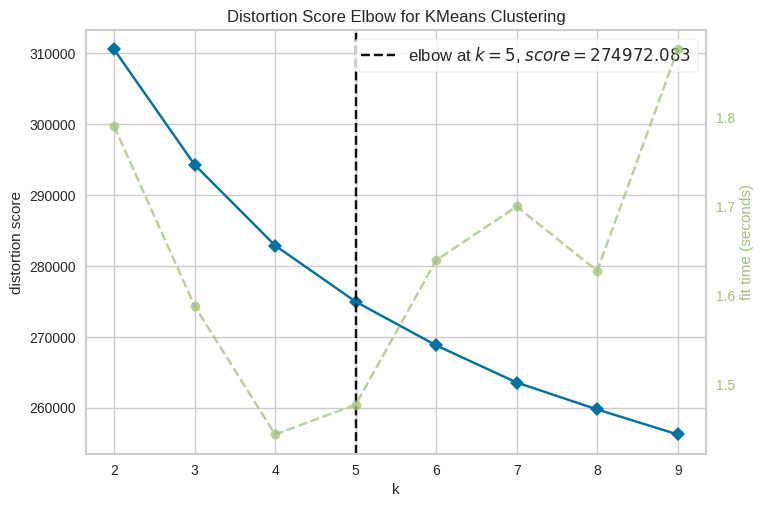

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [43]:
visualizer.fit(df_amostra)
visualizer.poof()

O gráfico acima representa os testes que o KMEANS executou, os plotando em forma de gráfico cartesiano.

# Agrupamento de participantes em CINCO grupos.

Aqui iremos atribuir os devidos registros aos seus grupos

In [103]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=38)
k_fit = kmeans.fit(df)

Fazendo a inserção dos clusters na base de dados

In [104]:
predict = k_fit.labels_
df['Clusters'] = predict

In [105]:
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.00,1.00,5.00,2.00,5.00,1.00,5.00,2.00,4.00,1.00,1.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,5.00,2.00,4.00,2.00,3.00,2.00,4.00,3.00,4.00,3.00,4.00,3.00,2.00,2.00,4.00,4.00,2.00,4.00,4.00,5.00,1.00,4.00,1.00,4.00,1.00,5.00,3.00,4.00,5.00,1
1,3.00,5.00,3.00,4.00,3.00,3.00,2.00,5.00,1.00,5.00,2.00,3.00,4.00,1.00,3.00,1.00,2.00,1.00,3.00,1.00,1.00,4.00,1.00,5.00,1.00,5.00,3.00,4.00,5.00,3.00,3.00,2.00,5.00,3.00,3.00,1.00,3.00,3.00,5.00,3.00,1.00,2.00,4.00,2.00,3.00,1.00,4.00,2.00,5.00,3.00,0
2,2.00,3.00,4.00,4.00,3.00,2.00,1.00,3.00,2.00,5.00,4.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,4.00,1.00,4.00,2.00,4.00,1.00,4.00,4.00,3.00,4.00,2.00,2.00,2.00,3.00,3.00,4.00,2.00,4.00,2.00,5.00,1.00,2.00,1.00,4.00,2.00,5.00,3.00,4.00,4.00,0
3,2.00,2.00,2.00,3.00,4.00,2.00,2.00,4.00,1.00,4.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,4.00,3.00,2.00,4.00,3.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,2.00,4.00,4.00,4.00,1.00,2.00,2.00,3.00,1.00,4.00,4.00,2.00,5.00,2.00,3.00,1.00,4.00,4.00,3.00,3.00,4
4,3.00,3.00,3.00,3.00,5.00,3.00,3.00,5.00,3.00,4.00,1.00,5.00,5.00,3.00,1.00,1.00,1.00,1.00,3.00,2.00,1.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,5.00,3.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,1.00,5.00,5.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,3.00,5.00,5.00,1


# Análise dos Grupos

In [106]:
df['Clusters'].value_counts()

# Quantidade de observações em cada grupo

Clusters
3    193065
1    182141
0    181513
2    170840
4    146875
Name: count, dtype: int64

Observação das médias de respostas por cluster

In [107]:
df.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.15,3.27,3.13,3.64,3.01,2.68,2.24,3.99,2.34,4.11,3.55,3.07,4.17,2.62,2.84,2.83,2.89,2.45,2.99,2.71,1.85,3.99,1.68,4.38,1.96,4.19,1.99,4.01,4.20,3.74,3.86,2.21,4.30,2.02,3.26,2.05,4.18,2.02,3.85,3.90,3.56,2.17,3.88,2.08,3.71,2.00,4.00,2.96,4.26,3.79
1,3.47,1.94,4.34,2.22,4.28,1.67,3.89,2.81,3.76,2.52,2.32,3.85,3.14,3.32,2.11,1.91,2.11,1.67,2.12,1.72,1.89,4.45,1.85,4.25,1.87,3.85,1.60,4.10,4.09,4.20,3.74,2.59,4.19,1.91,3.13,2.29,3.88,1.95,3.58,3.89,3.91,1.75,4.10,1.79,4.17,1.66,4.33,3.25,4.11,4.30
2,1.80,3.64,2.23,4.07,2.29,3.19,1.74,4.08,2.17,4.49,4.29,2.46,4.52,2.13,3.57,3.89,4.00,3.77,4.01,3.95,2.46,3.38,2.58,3.85,2.56,3.87,2.71,3.44,3.68,3.06,2.83,3.37,3.82,3.49,2.09,3.50,3.57,3.05,2.78,3.32,3.52,2.38,4.07,2.13,3.43,2.09,3.69,3.19,4.29,3.72
3,3.45,1.92,3.80,2.51,4.06,1.82,3.66,2.76,3.78,3.00,3.83,2.95,4.25,2.42,3.28,3.49,3.81,3.46,3.66,3.19,2.14,4.30,2.66,4.20,2.00,4.02,1.86,3.91,4.13,3.86,2.98,3.63,3.85,3.25,2.22,3.54,3.47,2.84,2.94,3.49,3.78,2.10,4.27,1.95,3.98,1.76,3.99,3.40,4.22,4.21
4,2.16,3.44,2.81,3.59,2.62,2.86,2.12,3.71,2.70,3.99,2.43,3.73,3.12,3.00,2.39,2.09,2.39,2.00,2.69,2.37,3.07,3.01,2.65,2.88,3.26,2.76,3.12,2.97,2.70,3.08,3.28,2.92,3.83,2.47,2.44,2.82,3.55,2.58,2.89,3.52,3.73,1.95,3.80,2.05,3.80,2.05,4.09,3.31,3.92,3.85


Esse trecho vamos tirar uma média geral de todas as respostas, então estamos pegando cada "range" das perguntas e armazenando em uma variável.
EXT = Extroversion,
EST = Neurotic e etc...
Estamos fazendo isso usando um parâmetro para pegar células de região X até Y

In [108]:
listaColunas = list(df)
ext = listaColunas[0:10]
est = listaColunas[10:20]
agr = listaColunas[20:30]
csn = listaColunas[30:40]
opn = listaColunas[40:50]

In [109]:
somatoriaPersonalities = pd.DataFrame()
somatoriaPersonalities['extroversion'] = df[ext].sum(axis=1)/10
somatoriaPersonalities['neurotic'] = df[est].sum(axis=1)/10
somatoriaPersonalities['agreeable'] = df[agr].sum(axis=1)/10
somatoriaPersonalities['conscientious'] = df[csn].sum(axis=1)/10
somatoriaPersonalities['open'] = df[opn].sum(axis=1)/10
somatoriaPersonalities['clusters'] = predict

Aqui é o resultado impresso das médias de extroversão e etc presente em cada cluster.

In [110]:
somatoriaPersonalities.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,3.06,3.01,3.20,3.16,3.24
1,3.09,2.43,3.21,3.11,3.34
2,2.97,3.66,3.16,3.18,3.25
3,3.07,3.43,3.31,3.22,3.37
4,3.00,2.62,2.95,3.03,3.25


Afim de plotar um gráfico, iremos armazenar essa somatória em uma nova variável que será usada em um subplot(usando o laço for para economizar linhas de código).

In [111]:
dataCluster = somatoriaPersonalities.groupby('clusters').mean()

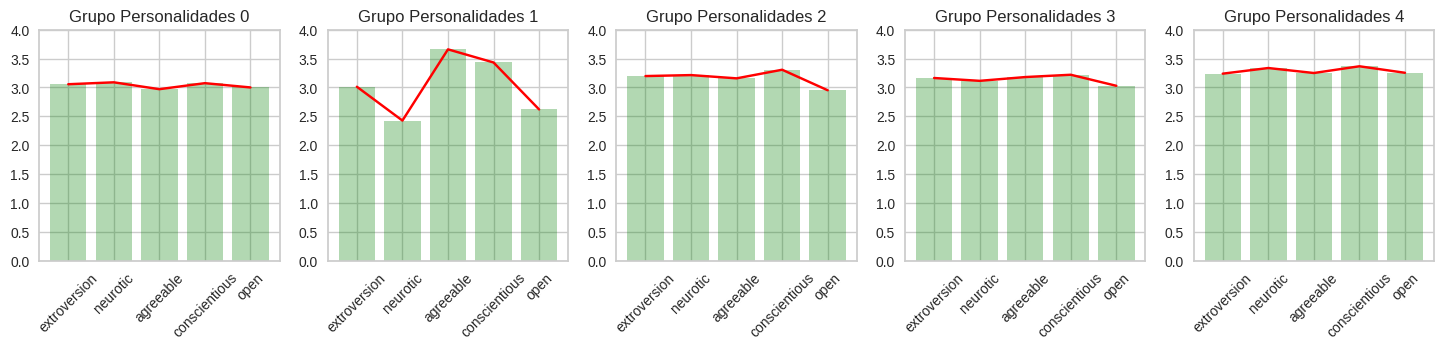

In [112]:
plt.figure(figsize=(18, 3))
for i in range(0, 5):
  plt.subplot(1,5,i+1)
  plt.bar(dataCluster.columns, dataCluster.iloc[:, i], color = "green", alpha = 0.3)
  plt.plot(dataCluster.columns, dataCluster.iloc[:, i], color = "red")
  plt.title("Grupo Personalidades " + str(i))
  plt.xticks(rotation = 45)
  plt.ylim(0,4);

# Finalização

Neste projeto, conseguimos explorar e analisar o conjunto de dados do Big Five Personality Test, aplicando técnicas de machine learning para agrupar os participantes em cinco grupos distintos. Nossa abordagem incluiu as seguintes etapas: coleta de dados, pré-processamento, análise exploratória e aplicação de algoritmos de clustering.

# Interpretação dos Clusters
Os clusters formados representam perfis de personalidade distintos baseados nos cinco grandes traços. Cada cluster reflete uma combinação única de abertura, conscienciosidade, extroversão, amabilidade e neuroticismo, permitindo-nos identificar características predominantes em cada grupo.

**Cluster 1**: Este grupo parece ter valores médios consistentes em todos os traços de personalidade, sem nenhum traço se destacando significativamente.

**Cluster 2**: Este grupo é caracterizado por baixa neuroticismo e alta amabilidade, sugerindo indivíduos emocionalmente estáveis e cooperativos.

**Cluster 3**: Este grupo destaca-se pela abertura ligeiramente mais alta, indicando uma tendência maior para criatividade e novas experiências.

**Cluster 4**: Combinando baixa neuroticismo e alta conscienciosidade, destacando indivíduos resilientes e disciplinados.

**Cluster 5**: Similar ao Grupo 0, este grupo tem valores médios em todos os traços de personalidade.

# Conclusão Final
Os gráficos mostram que, embora existam algumas variações entre os grupos, a maioria dos participantes possui valores moderados nos traços de personalidade. No entanto, algumas características destacam-se em determinados grupos, como a alta amabilidade no Grupo 1 e a maior conscienciosidade no Grupo 2.

# Considerações Finais
Este projeto demonstrou com sucesso a aplicação de técnicas de clustering para a análise de dados de personalidade. Através dos clusters formados, identificamos perfis distintos que podem ser úteis em diversas áreas, incluindo psicologia e marketing.